In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pyplot
import datetime
import sklearn as sk
from sklearn.linear_model import LinearRegression

In [2]:
# membaca file dan ubah tanggal menjadi time series
df = pd.read_csv("Kalimantan Timur.csv")
df['Tanggal'] = pd.to_datetime(df.Tanggal)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 354 entries, 0 to 353
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Tanggal  354 non-null    datetime64[ns]
 1   Tn       353 non-null    float64       
 2   Tx       352 non-null    float64       
 3   Tavg     348 non-null    float64       
 4   RH_avg   348 non-null    float64       
 5   RR       338 non-null    float64       
 6   ss       350 non-null    float64       
 7   ff_x     353 non-null    float64       
 8   ddd_x    353 non-null    float64       
 9   ff_avg   353 non-null    float64       
 10  ddd_car  353 non-null    object        
dtypes: datetime64[ns](1), float64(9), object(1)
memory usage: 30.5+ KB


C:\Users\rivan\AppData\Local\Temp\ipykernel_18224\3920466739.py:3: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['Tanggal'] = pd.to_datetime(df.Tanggal)


In [3]:
#ambil data tanggal, tn (temperatur minimum), tx(temperatur maksimum), RR(curah hujan), Tavg(tempeartur rata rata)
df1 = df[["Tanggal", "Tn","Tx","RR", "Tavg"]]
df1

,Tanggal,Tn,Tx,RR,Tavg
0,2023-01-01,23.8,32.6,0.0,27.5
1,2023-02-01,23.6,34.6,0.0,28.4
2,2023-03-01,22.7,32.9,9.6,26.2
3,2023-04-01,23.6,30.5,24.0,25.7
4,2023-05-01,23.9,33.8,8888.0,28.0
...,...,...,...,...,...
349,2023-12-16,24.1,33.2,0.5,27.7
350,2023-12-17,24.6,35.0,0.3,28.3
351,2023-12-18,24.6,33.6,0.0,27.5
352,2023-12-19,24.7,33.4,0.0,27.8


In [4]:
# cek duplikat
df1.duplicated('Tanggal', keep=False).sum()

0

In [5]:
# hapus duplikat
df1 = df1.drop_duplicates('Tanggal', keep='first').reset_index()
df1.duplicated().sum()

0

In [6]:
# ganti kode 8888 menjadi 0.0
df1 = df1.replace(8888, 0.0)
df1.loc[df1['RR']==8888].count()

index      0
Tanggal    0
Tn         0
Tx         0
RR         0
Tavg       0
dtype: int64

In [7]:
# sort berdasarkan tanggal
df1 = df1.sort_values(by=["Tanggal"]).reset_index()
df1

,level_0,index,Tanggal,Tn,Tx,RR,Tavg
0,0,0,2023-01-01,23.8,32.6,0.0,27.5
1,31,31,2023-01-02,23.2,28.6,17.0,25.6
2,59,59,2023-01-03,23.5,33.1,0.0,27.4
3,90,90,2023-01-04,24.3,32.2,2.4,27.2
4,120,120,2023-01-05,23.4,34.4,34.2,26.9
...,...,...,...,...,...,...,...
349,349,349,2023-12-16,24.1,33.2,0.5,27.7
350,350,350,2023-12-17,24.6,35.0,0.3,28.3
351,351,351,2023-12-18,24.6,33.6,0.0,27.5
352,352,352,2023-12-19,24.7,33.4,0.0,27.8


In [8]:
#cek null
df1.isnull().sum()

level_0     0
index       0
Tanggal     0
Tn          1
Tx          2
RR         16
Tavg        6
dtype: int64

In [9]:
# isi yang null
mrr = df1['RR'].mean()
tnn = df1['Tn'].mean()
txx = df1['Tx'].mean()
mav = (df1['Tn'] + df1['Tx'])/2

df1['RR'] = df1['RR'].fillna(mrr)
df1['Tn'] = df1['Tn'].fillna(tnn)
df1['Tx'] = df1['Tx'].fillna(txx)
df1['Tavg'] = df1['Tavg'].fillna(mav)

df1.isnull().sum()

level_0    0
index      0
Tanggal    0
Tn         0
Tx         0
RR         0
Tavg       1
dtype: int64

In [10]:
ma = df1['Tavg'].mean()
df1['Tavg'] = df1['Tavg'].fillna(ma)
df1.isnull().sum()

level_0    0
index      0
Tanggal    0
Tn         0
Tx         0
RR         0
Tavg       0
dtype: int64

<Axes: >

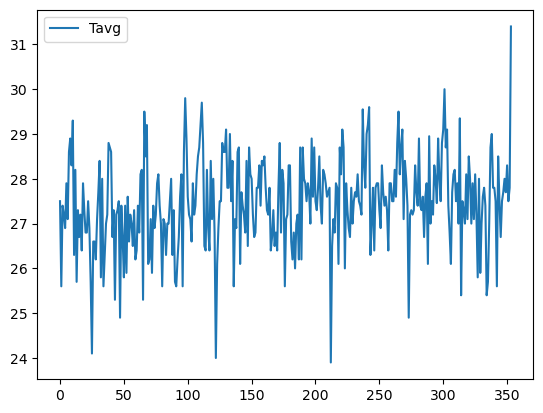

In [11]:
#plotting tavg
df1[['Tavg']].plot()

<Axes: >

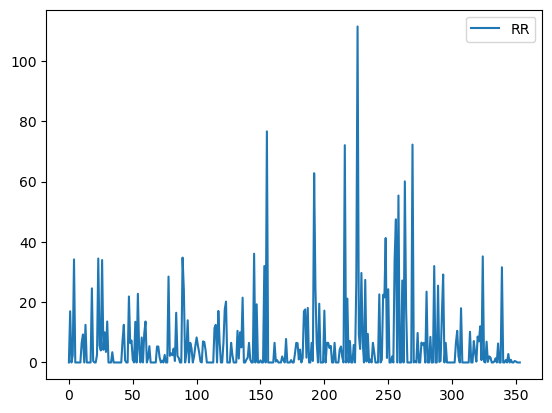

In [12]:
#plotting tavg
df1[['RR']].plot()

In [13]:
#shifting tx, tavg, dan rr
df1['ptx'] = df1.shift(-1)["Tx"]
df1['pta'] = df1.shift(-1)["Tavg"]
df1['ptr'] = df1.shift(-1)["RR"]
df1

,level_0,index,Tanggal,Tn,Tx,RR,Tavg,ptx,pta,ptr
0,0,0,2023-01-01,23.8,32.6,0.0,27.5,28.6,25.6,17.0
1,31,31,2023-01-02,23.2,28.6,17.0,25.6,33.1,27.4,0.0
2,59,59,2023-01-03,23.5,33.1,0.0,27.4,32.2,27.2,2.4
3,90,90,2023-01-04,24.3,32.2,2.4,27.2,34.4,26.9,34.2
4,120,120,2023-01-05,23.4,34.4,34.2,26.9,33.2,27.9,0.0
...,...,...,...,...,...,...,...,...,...,...
349,349,349,2023-12-16,24.1,33.2,0.5,27.7,35.0,28.3,0.3
350,350,350,2023-12-17,24.6,35.0,0.3,28.3,33.6,27.5,0.0
351,351,351,2023-12-18,24.6,33.6,0.0,27.5,33.4,27.8,0.0
352,352,352,2023-12-19,24.7,33.4,0.0,27.8,36.0,31.4,0.0


In [14]:
# ambil data RR, tavg, pta, ptr
df1 = df1[['RR', 'Tavg', 'pta', 'ptr']]
df1

,RR,Tavg,pta,ptr
0,0.0,27.5,25.6,17.0
1,17.0,25.6,27.4,0.0
2,0.0,27.4,27.2,2.4
3,2.4,27.2,26.9,34.2
4,34.2,26.9,27.9,0.0
...,...,...,...,...
349,0.5,27.7,28.3,0.3
350,0.3,28.3,27.5,0.0
351,0.0,27.5,27.8,0.0
352,0.0,27.8,31.4,0.0


In [15]:
#hapus yang kosong
df1 = df1.iloc[:-1, :].copy()
df1

,RR,Tavg,pta,ptr
0,0.0,27.5,25.6,17.0
1,17.0,25.6,27.4,0.0
2,0.0,27.4,27.2,2.4
3,2.4,27.2,26.9,34.2
4,34.2,26.9,27.9,0.0
...,...,...,...,...
348,0.0,28.0,27.7,0.5
349,0.5,27.7,28.3,0.3
350,0.3,28.3,27.5,0.0
351,0.0,27.5,27.8,0.0


In [16]:
#import library
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [17]:
#buat indeks
df1['Indeks'] = df1.reset_index().index
df1

,RR,Tavg,pta,ptr,Indeks
0,0.0,27.5,25.6,17.0,0
1,17.0,25.6,27.4,0.0,1
2,0.0,27.4,27.2,2.4,2
3,2.4,27.2,26.9,34.2,3
4,34.2,26.9,27.9,0.0,4
...,...,...,...,...,...
348,0.0,28.0,27.7,0.5,348
349,0.5,27.7,28.3,0.3,349
350,0.3,28.3,27.5,0.0,350
351,0.0,27.5,27.8,0.0,351


In [18]:
#data training dan testing
X = df1[["Indeks", "Tavg"]]
y = df1["pta"]

In [19]:
#data spliting
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size = 0.2, random_state=0, shuffle = False)


In [20]:
#data fitting
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [21]:
X_test

,Indeks,Tavg
282,282,27.4
283,283,27.3
284,284,27.6
285,285,26.7
286,286,27.6
...,...,...
348,348,28.0
349,349,27.7
350,350,28.3
351,351,27.5


In [22]:
#testing
pred1 = lr.predict(X_test)
pred1

array([27.7105101 , 27.69301361, 27.75402088, 27.57951684, 27.75827978,
       27.81928706, 27.46814952, 28.02961836, 27.6490419 , 27.74930107,
       27.69255268, 27.91056751, 27.85381913, 27.74956262, 28.03471151,
       27.86020747, 27.7642072 , 28.02147391, 28.08248119, 28.26124413,
       28.00823631, 28.08886953, 27.75735793, 27.64173172, 27.50647956,
       27.8226241 , 27.90325733, 27.92501272, 27.78976056, 27.87039378,
       27.69588973, 28.15922886, 27.38613353, 27.80040779, 27.76328535,
       27.70653697, 27.9245518 , 27.7304218 , 28.00731446, 27.91131419,
       27.7171842 , 27.89594714, 27.74106904, 27.93945792, 27.76495388,
       27.49232011, 27.92622032, 27.51620495, 27.73421978, 27.85410489,
       27.89548622, 27.81911189, 27.42872246, 27.48972974, 27.74699646,
       28.08276695, 28.14377423, 27.91039235, 27.91252179, 27.85577341,
       27.48500993, 28.05629174, 27.86216175, 27.70728365, 27.86642064,
       27.90780198, 27.96880926, 27.91206087, 28.03194598, 27.87

In [23]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
mae = mean_absolute_error(y_test, pred1)
mse = mean_squared_error(y_test, pred1)
print(mae, mse)

0.7639578750607857 1.0857568579417045


In [24]:
X_test['Indeks'] = X_test.index
X_test

,Indeks,Tavg
282,282,27.4
283,283,27.3
284,284,27.6
285,285,26.7
286,286,27.6
...,...,...
348,348,28.0
349,349,27.7
350,350,28.3
351,351,27.5


In [25]:
predd = pd.DataFrame(pred1).set_index(X_test['Indeks'])
predd

,0
Indeks,
282,27.710510
283,27.693014
284,27.754021
285,27.579517
286,27.758280
...,...
348,27.968809
349,27.912061
350,28.031946


In [26]:
kan = pd.concat([df1['Tavg'], predd], axis=1)
kan.sort_index(False).head(1000)

C:\Users\rivan\AppData\Local\Temp\ipykernel_18224\2636922572.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.sort_index will be keyword-only.
  kan.sort_index(False).head(1000)


,Tavg,0
0,27.5,NaN
1,25.6,NaN
2,27.4,NaN
3,27.2,NaN
4,26.9,NaN
...,...,...
348,28.0,27.968809
349,27.7,27.912061
350,28.3,28.031946
351,27.5,27.877068


<Axes: >

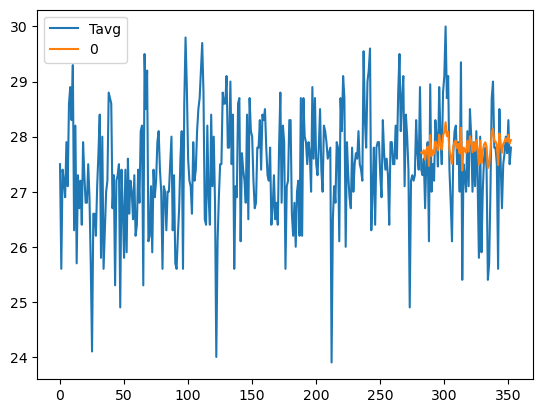

In [27]:
kan.plot()

In [28]:
new_data = [[354, 28.2],[355, 28.2],[356, 28.2],[357, 28.2],[358, 28.2],[359, 28.2],[360, 28.2]]
lr.predict(new_data)

C:\Users\rivan\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([28.02083783, 28.02296727, 28.02509672, 28.02722617, 28.02935561,
       28.03148506, 28.03361451])

In [30]:
kan.to_json('Prediksi Kalimantan Timur.json')